### IBDA2032 - Kelompok 7
1. Christopher Jonathan (IBDA 2021 / 212100170). Kontribusi: 33.333%
2. Matthew Daniel Surupati (IBDA 2020 / 202000673). Kontribusi: 33.333%
3. Tatiana Clarissa Jolie (IBDA 2021 / 212100674). Kontribusi: 33.333%

### Latar Belakang

Masalah yang ingin kami selesaikan mengenai **perkiraan penghasilan seseorang**, khususnya **memperkirakan apakah penghasilan orang tersebut berada di atas atau di bawah 50k**.

Kami menggunakan open data yang berasal dari https://archive.ics.uci.edu/ml/datasets/Adult.

Data ini merupakan **data ready** yang dapat langsung kami kelola nantinya untuk memperkirakan penghasilan seseorang tersebut. Isi dari data tersebut terbagi menjadi:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspect, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: **>50K, <=50K**

Machine Learning yang akan kami gunakan termasuk **Supervised Learning dalam Classification**. Pada Class Distribution nantinya kami akan menentukan probability untuk label '>50K' dan probability untuk label '<=50K'. 

### Library yang digunakan

Berikut ini library yang kami gunakan dalam menyelesaikan proyek UTS ini:

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Pemanggilan Data

Data yang kelompok kami gunakan berada di dalam `adult.csv`. Berikut ini cara pemanggilan data yang kami gunakan:

In [2]:
data = pd.read_csv('adult.csv')
display(data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Pengecekan Data 

Selanjutnya, kami mengecek apakah data yang digunakan untuk diklasifikasikan sudah balance atau masih belum balance.

In [3]:
x = data.drop(["salary"], axis=1)
y = data[["salary"]]
density = pd.get_dummies(y, drop_first=True)
density = density.value_counts(normalize=True).reset_index()
density

,salary_ >50K,0
0,0,0.75919
1,1,0.24081


Dapat dilihat bahwa salary `<=50K` lebih banyak dibandingkan salary `>50k`. Berdasarkan pengecekan, data yang ingin diklasifikasikan tidak balance.

### Penyelesaian Klasifikasi (Highlight)

Dalam pengerjaan ini kami mempunyai 2 penyelesaian klasifikasi ini:
1. Tanpa menggunakan library `SMOTE`.
2. Menggunakan tambahan library `SMOTE`. 
   Kami menggunakan library `SMOTE` untuk menambahkan data yang akan menghasilkan sampel yang baru dari kelas minoritas dengan cara mengambil tetangga-tetangga terdekat dari sampel asli. 
   
   Teknik ini digunakan untuk meningkatkan kinerja model klasifikasi pada dataset yang tidak seimbang ketika kelas mayoritas memiliki jumlah sampel yang jauh lebih besar daripada kelas minoritas. 

Kedua penyelesaian ini bertujuan agar menjadi perbandingan pada hasil akhir.

### Memanggil Model dan Melakukan Classification

Kami menggunakan Random Forest Classifier dalam proyek klasifikasi ini karena mampu mengatasi data yang overfitting. Algoritma ini juga mampu menangani data yang tidak seimbang (imbalanced data). Random Forest Classifier termasuk ke dalam kategori ensemble learning. Algoritma ini bekerja dengan cara membangun banyak pohon keputusan (decision trees) secara acak, lalu menggabungkan hasil prediksi dari setiap pohon untuk mencapai hasil akhir yang lebih akurat.

Setiap pohon keputusan dalam Random Forest Classifier dibangun menggunakan subset acak dari fitur-fitur yang tersedia dan subset acak dari sampel data yang tersedia sehingga setiap pohon keputusan dalam Random Forest Classifier memiliki kemampuan untuk memodelkan pola yang berbeda pada setiap subset data dan fitur yang berbeda.

In [4]:
# Define the classifier

# Before Balancing
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Data Before Balancing")
display(x_train)
display(y_train)

# Balanced (SMOTE)
sm = SMOTE(random_state = 42)
x_b, y_b = sm.fit_resample(x,y)
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=0.2, random_state=42)

print("\nData Balanced")
display(x_b_train)
display(y_b_train)

Data Before Balancing


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
5514,33,198183,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19777,36,86459,11,0,1887,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10781,58,203039,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32240,21,180190,11,0,0,46,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9876,27,279872,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,359461,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5390,31,147215,8,0,0,21,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,18,216284,7,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15795,50,54261,9,0,0,84,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,salary
5514,>50K
19777,>50K
10781,<=50K
32240,<=50K
9876,<=50K
...,...
29802,<=50K
5390,<=50K
860,<=50K
15795,<=50K



Data Balanced


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
41432,35,111416,14,0,0,63,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16109,43,111895,13,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40444,47,146881,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26927,19,175083,9,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43968,49,34376,8,0,0,39,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,200117,13,0,1887,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,40,254989,9,0,0,46,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38158,29,67188,12,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,18,216284,7,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,salary
41432,>50K
16109,>50K
40444,>50K
26927,<=50K
43968,>50K
...,...
11284,>50K
44732,>50K
38158,>50K
860,<=50K


In [5]:
rfc_1 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_2 = RandomForestClassifier(n_estimators=100, random_state=42)

rfc_1.fit(x_train, y_train)
rfc_2.fit(x_b_train, y_b_train)

y1_pred = rfc_1.predict(x_test)
y2_pred = rfc_2.predict(x_b_test)

compare1 = pd.DataFrame({"y_True":y_test["salary"], "y_pred": y1_pred})
compare2 = pd.DataFrame({"y_True":y_b_test["salary"], "y_pred": y2_pred})

print("Data Before Balancing")
display(compare1)

print("\nData Balanced")
display(compare2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13908\1947240878.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_1.fit(x_train, y_train)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13908\1947240878.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_2.fit(x_b_train, y_b_train)


Data Before Balancing


,y_True,y_pred
14160,<=50K,<=50K
27048,<=50K,<=50K
28868,>50K,>50K
5667,<=50K,<=50K
7827,<=50K,<=50K
...,...,...
1338,<=50K,<=50K
24534,>50K,<=50K
18080,>50K,>50K
10354,<=50K,<=50K



Data Balanced


,y_True,y_pred
32168,<=50K,<=50K
199,<=50K,<=50K
16026,<=50K,<=50K
10791,<=50K,<=50K
33656,>50K,>50K
...,...,...
30612,<=50K,<=50K
33730,>50K,>50K
4546,>50K,>50K
26559,>50K,<=50K


### Membuat Confusion Matrix

Untuk mengetahui tingkat akurasi dari model yang sudah dibuat.

Text(0.5, 427.9555555555555, 'Predicted label')

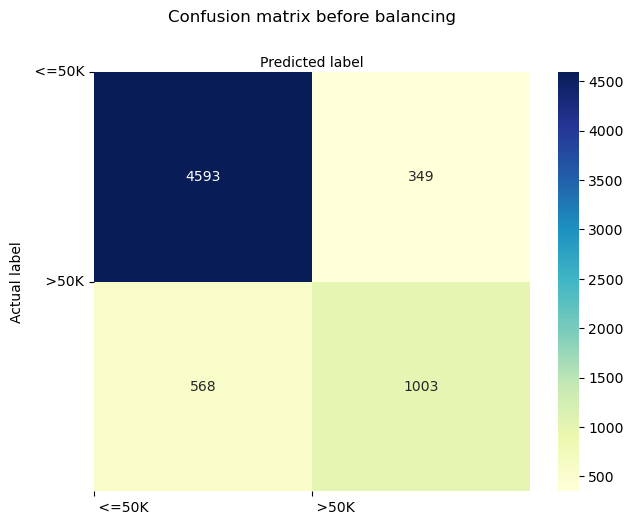

In [6]:
salary = data["salary"].unique()
salary = np.sort(salary)
cnf_matrix = metrics.confusion_matrix(y_test, y1_pred, labels = salary)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(salary))

plt.xticks(tick_marks, salary, ha="left")
plt.yticks(tick_marks, salary, rotation='horizontal')
plt.tight_layout()

plt.title('Confusion matrix before balancing', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

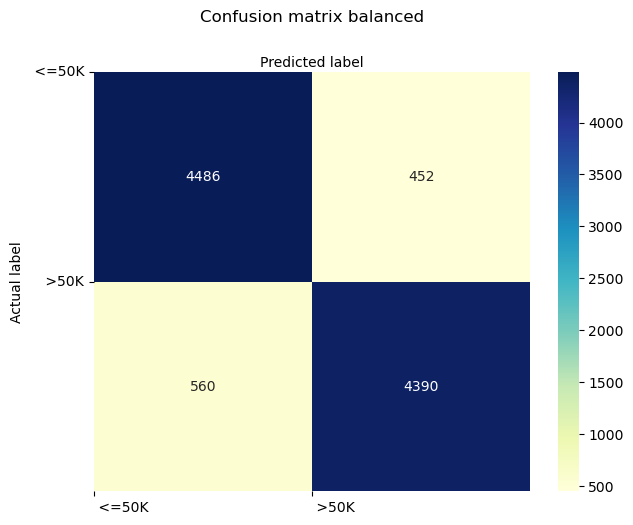

In [7]:
salary = data["salary"].unique()
salary = np.sort(salary)
cnf_matrix = metrics.confusion_matrix(y_b_test, y2_pred, labels = salary)

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(salary))

plt.xticks(tick_marks, salary, ha="left")
plt.yticks(tick_marks, salary, rotation='horizontal')
plt.tight_layout()

plt.title('Confusion matrix balanced', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Menampilkan Ukuran Performansi Klasifikasi

Berikut ini perkiraan ukuran performasi Accuracy, Precision, Recall, dan F1:

In [8]:
print("---------------- Data Before Balancing ----------------\n")
print(classification_report(y_test, y1_pred))

---------------- Data Before Balancing ----------------

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.74      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513



In [9]:
print("------------------- Data Balanced ---------------------\n")
print(classification_report(y_b_test, y2_pred))

------------------- Data Balanced ---------------------

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4938
        >50K       0.91      0.89      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



### Kesimpulan 

Berdasarkan nilai pada confusion matrix di atas, dapat dilihat bahwa klasifikasi akurasi yang didapatkan **before balancing** mendapatkan hasil akurasi sekitar 80%. Lalu, pada data yang **balanced** (setelah menggunakan library `SMOTE`) itu mendapatkan hasil akurasi 90%.

Kesimpulannya, confusion matrix yang ada di atas menunjukkan bahwa model tersebut tidak 100% akurat. Hal ini disebabkan karena  data yang akan diklasifikasikan tidak balance. Oleh karena itu, akan berpengaruh pada tingkat accuracy, yang akan menurunkan tingkat % accuracy dari data yang diprediksi.

Menurut kami, hasil klasifikasi dengan menggunakan library `SMOTE` sudah baik karena hasil akurasi masih mendapatkan nilai 90%. Dibandingkan dengan hasil klasifikasi tanpa library `SMOTE` yang hanya mendaptkan hasil akurasi 80%. 

Jadi, dalam menyelesaikan permasalahan yang kami lakukan, akurasi yang didapatkan dari **before balancing** atau **balanced** sudah cukup. Namun, data yang **balanced** jauh lebih akurat f1 score nya.

### GitHub

Link GitHub: https://github.com/MatthewSurupati/Salary-Classification

## Komitmen Integritas

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.”